In [ ]:
#This program generates a list of 500+ latitutdes and longitudes across the world, finds the cities nearest to the 
#combination of latitude and longitude, uses the weather API to fetch the weather for each of these cities, and plots graphs
# for temperature, humidity, cloudiness, and wind speed vs these cities.

In [ ]:
#Here are the  observable trends based on the graphs plotted for this exercise:

#1. Temperatures are warmer towards the equator, hovering close to 100F during the current time of year (Sep), and lower, 
#   closer to the poles, hovering around 50F during the current time of year.

#2. Cloudiness does not seem to follow any specific pattern (at least as of the current time of year) and seems independent of 
#   latitude. In looking at the graph it does look like a LOT of cities across the various latitudes are currently experiencing 
#   0% cloudiness.

#3. Similarly, wind speed also seems independent of the latitude (as of the current time of year), seems to hover between 
#   0 and 10 mph, more specifically between 0 and 10 mph for the most part.


In [5]:
from citipy import citipy as cp
import requests as req
import seaborn 
from random import uniform #to be used to generate the list of 500 random lat/longs
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

In [6]:
#Get at least 500 unique random latitudes and longitudes across the world. There's 4 loops, 1 for each quadrant to get an even distribution 
#across the globe.
#Fetching about 4000 random lat/longs since there are loads of duplicates on the nearest city corresponding to these lat/longs

#First initialize the list of lat, long coordinates
latLongList = []
cityList = []

#First quadrant
for i in range(0,1000):
    lat,long = uniform(-180,-90), uniform(-90, 90)
    latLong = (lat,long)
    latLongList.append(latLong)
    
    #Get the nearest city corresponding to these coordinates
    city = cp.nearest_city(lat, long)
    countryCity = (city.country_code,city.city_name)
    cityList.append(countryCity)

#Second quadrant
for i in range(1000,2001):
    lat,long = uniform(-90,0), uniform(-90, 90)
    latLong = (lat,long)
    latLongList.append(latLong)
    
    #Get the nearest city corresponding to these coordinates
    city = cp.nearest_city(lat, long)
    countryCity = (city.country_code,city.city_name)
    cityList.append(countryCity)   
    
for i in range(2001,3001):
    lat,long = uniform(0,90), uniform(-90, 90)
    latLong = (lat,long)
    latLongList.append(latLong)
    
    #Get the nearest city corresponding to these coordinates
    city = cp.nearest_city(lat, long)
    countryCity = (city.country_code,city.city_name)
    cityList.append(countryCity)   
    
for i in range(3001,4001):
    lat,long =  uniform(90,180), uniform(-90, 90)
    latLong = (lat,long)
    latLongList.append(latLong)
    
    #Get the nearest city corresponding to these coordinates
    city = cp.nearest_city(lat, long)
    countryCity = (city.country_code,city.city_name)
    cityList.append(countryCity)     
    
#Removing duplicate cities from the list

cityListUnique = set(cityList)


In [7]:
#Initilaize the dataframe that will hold the weather data for the various cities
cityWeatherList=[]

#OpenWeatherMap api key
#apiKey = "eb65d0b4cd003e226c7ffd1efcc9c28d"
apiKey = "7657f21bcf60c675753623ad2c65dd0f"

#counter to track the city and country being processed
counter = 0

#Iterate through the list of 500+ unique cities and fetch the weather data from the OpenWeatherMap API
for x in cityListUnique:
    
    #Increment the counter
    counter = counter + 1
    
    #Build OpenWeatherMap url for city
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&APPID=%s" % (x[1], x[0], apiKey)
    
    #Hit the OpenWeatherMap API and get weather data for the city
    weather = req.get(url).json()
    
    try:
        print("Record " + str(counter) + " | Getting weather for City:" + x[0] + ", " + "City Id:" + str(weather["id"]) + ", Country:" + x[1])
        print("url =" + url)
        
        #Get the required data from the openweathermap api json and put in a dictionary
        country = x[0]
        city = x[1]
        cityLat = weather["coord"]["lat"]
        cityTemp = (weather["main"]["temp_max"]  * 9/5) - 459.67
        cityWind = weather["wind"]["speed"]
        cityHumidity = weather["main"]["humidity"]
        cityCloudiness = weather["clouds"]["all"]
        cityWeatherDict = {"city":city,"country":country,"lat":cityLat,"temp":cityTemp,"wind":cityWind,"humidity":cityHumidity,"cloudiness":cityCloudiness}
       
        #Append dictionary to a list
        cityWeatherList.append(cityWeatherDict)
       
    except:
        print("Did not find weather for City:" + x[0]+ ", Country:" + x[1])

#Convert list of dictionaries to a dataframe -- makes it easier to pass the required columns to the scatterplot
cityWeatherdf = pd.DataFrame(cityWeatherList) 
cityWeatherdf.to_csv("CityWeather_Results.csv")
print(cityWeatherdf)

Record 1 | Getting weather for City:ma, City Id:2527087, Country:tiznit
url =http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&APPID=7657f21bcf60c675753623ad2c65dd0f
Record 2 | Getting weather for City:af, City Id:1140026, Country:herat
url =http://api.openweathermap.org/data/2.5/weather?q=herat,af&APPID=7657f21bcf60c675753623ad2c65dd0f
Record 3 | Getting weather for City:is, City Id:3414079, Country:olafsvik
url =http://api.openweathermap.org/data/2.5/weather?q=olafsvik,is&APPID=7657f21bcf60c675753623ad2c65dd0f
Record 4 | Getting weather for City:ml, City Id:2451478, Country:segou
url =http://api.openweathermap.org/data/2.5/weather?q=segou,ml&APPID=7657f21bcf60c675753623ad2c65dd0f
Record 5 | Getting weather for City:no, City Id:779683, Country:hammerfest
url =http://api.openweathermap.org/data/2.5/weather?q=hammerfest,no&APPID=7657f21bcf60c675753623ad2c65dd0f
Record 6 | Getting weather for City:ml, City Id:2449893, Country:tessalit
url =http://api.openweathermap.org/data/2.5/

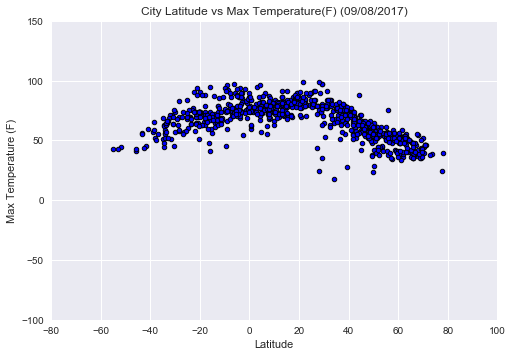

In [16]:
#Plot scatterplot for Temperature (F) vs. Latitude
plt.title("City Latitude vs Max Temperature(F) " + dt.now().strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(cityWeatherdf["lat"],cityWeatherdf["temp"], marker = "o", edgecolors = "k",
            s=20, c="b",alpha=1.0,linewidth = 1 )
        
plt.xticks([-80,-60,-40,-20,0, 20,40,60,80,100])
plt.yticks([-100,-50,0,50,100,150])
plt.savefig("LatvsMaxTemp.png")
plt.show()   


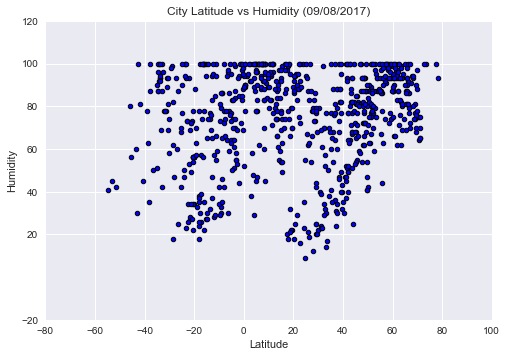

In [12]:
#Plot scatterplot for Latitude vs Humidity
plt.title("City Latitude vs Humidity " + dt.now().strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(cityWeatherdf["lat"],cityWeatherdf["humidity"], marker = "o", edgecolors = "k",
            s=20, c="b",alpha=1.0,linewidth = 1 )
    
plt.xticks([-80,-60,-40,-20,0, 20,40,60,80,100])
plt.yticks([-20,20,40,60,80,100,120])
plt.savefig("LatvsHumidity.png")
plt.show()   

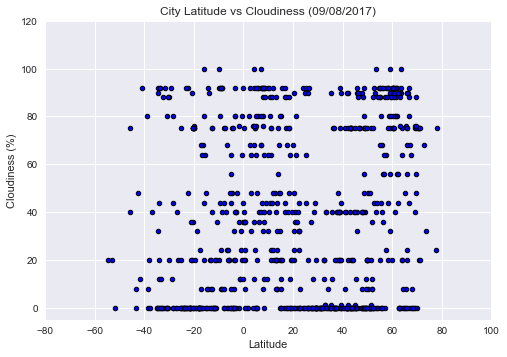

In [17]:
#Plot scatterplot for Latitude vs Cloudiness
plt.title("City Latitude vs Cloudiness " + dt.now().strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(cityWeatherdf["lat"],cityWeatherdf["cloudiness"], marker = "o", edgecolors = "k",
            s=20, c="b",alpha=1.0,linewidth = 1 )
    
plt.xticks([-80,-60,-40,-20,0, 20,40,60,80,100])
plt.yticks([0,20,40,60,80,100,120])
plt.savefig("LatvsCloudiness.png")
plt.show()  

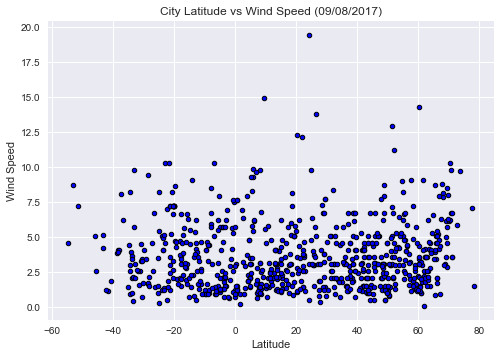

In [14]:
#Plot scatterplot for Latitude vs Wind Speed
plt.title("City Latitude vs Wind Speed " + dt.now().strftime("(%m/%d/%Y)"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(cityWeatherdf["lat"],cityWeatherdf["wind"], marker = "o", edgecolors = "k",
            s=20, c="b",alpha=1.0,linewidth = 1 )
    
#plt.xticks([-80,-60,-40,-20,0, 20,40,60,80,100])
#plt.yticks([-20,20,40,60,80,100,120])
plt.savefig("LatvsWindSpeed.png")
plt.show() 